In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
#exploring category
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

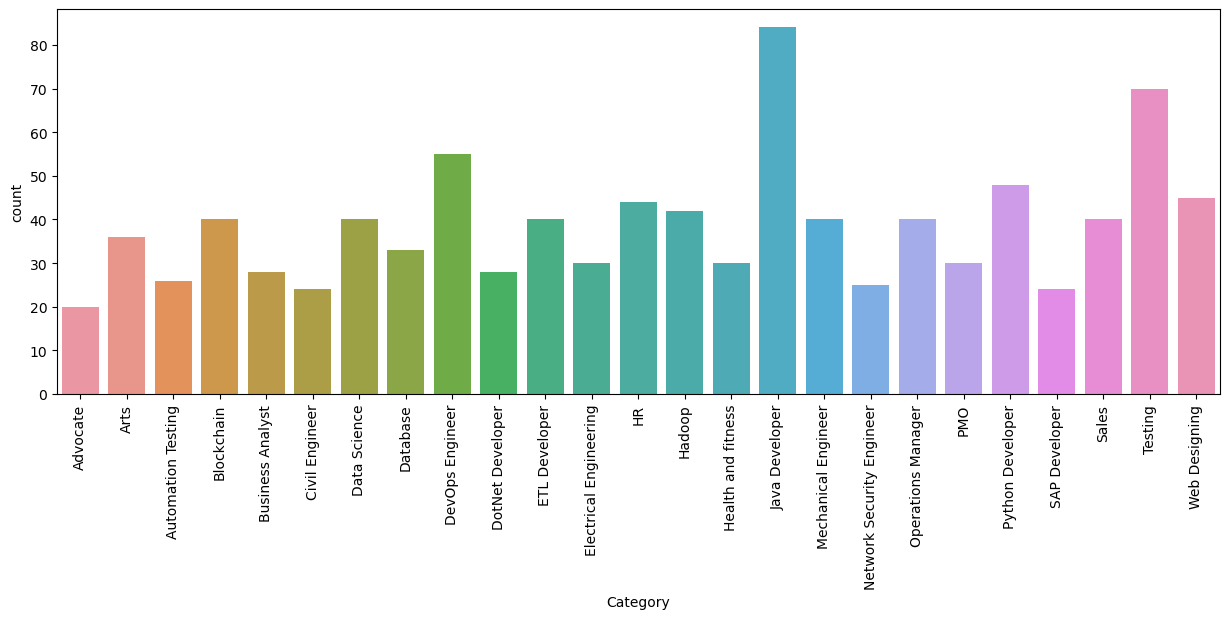

In [6]:
df['Category'] = df['Category'].astype('category')

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

In [7]:
df['Category'].unique()

['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', ..., 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']
Length: 25
Categories (25, object): ['Advocate', 'Arts', 'Automation Testing', 'Blockchain', ..., 'SAP Developer', 'Sales', 'Testing', 'Web Designing']

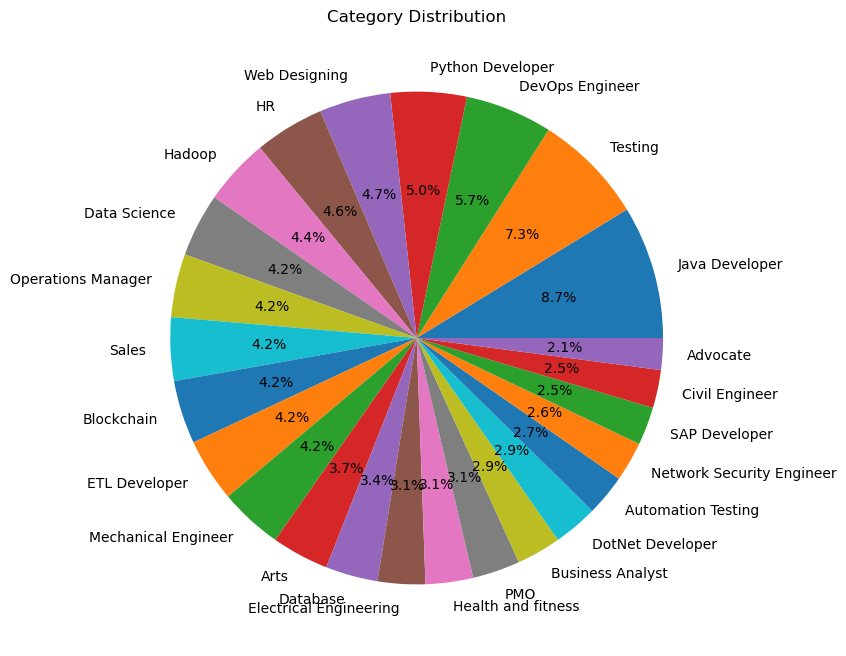

In [8]:
# Calculate the count of each category
category_counts = df['Category'].value_counts()
labels = category_counts.index
counts = category_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

In [9]:
#exploring resume
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [11]:
#cleaning data
#removing urls, hastags, mentions, special 
#letter, punctuations
#creating a function to do this process

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s',' ',txt)
    cleanText = re.sub('RT|cc',' ',cleanText)
    cleanText = re.sub('@\S+',' ',cleanText)
    cleanText = re.sub('#\S+\s',' ',cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
    cleanText = re.sub('r[^\x00-\x7f]',' ',cleanText)
    cleanText = re.sub('â¢', '', cleanText)
    cleanText = re.sub('â', '', cleanText)
    cleanText = re.sub('\s+',' ',cleanText) #to remove sequence
                      
    return cleanText

In [12]:
#dummy sentence to check
cleanResume("my ### $ # website link is this http://hello and access it @gmail.com")

'my website link is this and a ess it '

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [14]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

In [15]:
#words into categorical values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [18]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', ..., 
# 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']
# Length: 25
# Categories (25, object): ['Advocate', 'Arts', 'Automation Testing', 
# 'Blockchain', ..., 'SAP Developer', 'Sales', 'Testing', 'Web Designing']

In [19]:
#vactorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

#trained on column of resume
tfidf.fit(df['Resume']) #every columns of resume are vectorized by this

requiredText = tfidf.transform(df['Resume'])

In [20]:
#splitting

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [22]:
X_train.shape

(769, 7381)

In [23]:
X_test.shape

(193, 7381)

In [25]:
#training the model and print the classification report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
#now we interate this trained algorithm into our website
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))


0.9844559585492227


In [27]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [26]:
#prediction system
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))


In [33]:
myresume = """Data Scientist with PhD in Physics and 1+ industrial experience. Two years of working experience
in Data Analysis team of LIGO Scientific Collaboration [$3M Special Breakthrough Prize winner of
2016]. Over ten years of successful research experience in both theoretical and computational
physics. Strong problem-solving and analytical skills. Advanced programming proficiency. Certified
in Data Analysis and Machine Learning"""

In [34]:
import pickle

#load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

#clean the input resume
cleaned_resume = cleanResume(myresume)

#transform the cleaned resume using the trained TfidVectorizer
input_features = tfidf.transform([cleaned_resume])

#make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

#map ctaegory ID to category name
category_mapping = {
  15:"Java Developer",
  23:"Testing",
  8:"DevOps Engineer",
  20:"Python Developer",
  24:"Web Designing",
  12:"HR",
  13:"Hadoop",
  3:"Blockchain",
  10:"ETL Developer",
  18:"Operations Manager",
  6: "Data Science",
  22:"Sales",
  16:"Mechanical Engineering",
  1: "Arts",
  7: "Database",
  11: "Electrical Engineering",
  14: "Health and fitness",
  19: "PMO",
  4: "Business Analyst",
  9: "Dotnet Developer",
  2: "Automatic Testing",
  17: "Network Security Engineer",
  21: "SAP Developer",
  5: "Civil Engineer",
  0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted category:", category_name)
print(prediction_id)

Predicted category: Data Science
6
